# EcoFOCIpy ADCP QC - 22CKP-5A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('22ckp5a_0044m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 7773, depth: 12)
Coordinates:
  * time             (time) datetime64[ns] 2022-11-01 ... 2023-09-20T20:00:00
  * depth            (depth) float64 -6.0 -2.0 2.0 6.0 ... 26.0 30.0 34.0 38.0
  * latitude         (latitude) float64 71.26
  * longitude        (longitude) float64 -158.0
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 17.37 ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 2.303 ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 -0.2 ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -0.1 ... nan
    agc1             (latitude, longitude, time, depth) float64 143.0 ... nan
    agc2             (latitude, longitude, time, depth) float64 141.0 ... nan
    agc3             (latitude, longitude, time, depth) float64 144.0 ... nan
    agc4             (latitude, longitude, time, depth) float64 150.0 ... nan
Attributes:
    Latitude_DegMMddW:                      71 15.566 N
    Longitude_DegMMddN:                     157 59.943 W
    MooringID:                              22CKP-5A
    platform_deployment_date:               2022-10-17T21:32:00Z
    platform_deployment_cruise_name:        SKQ2022-14S
    platform_recovery_date:                 2023-09-20T17:30:00Z
    platform_recovery_cruise_name:          SKQ202312S
    platform_deployment_recovery_comments:  
    WaterDepth:                             49.0
    date_created:                           2023-11-16T14:50:22Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

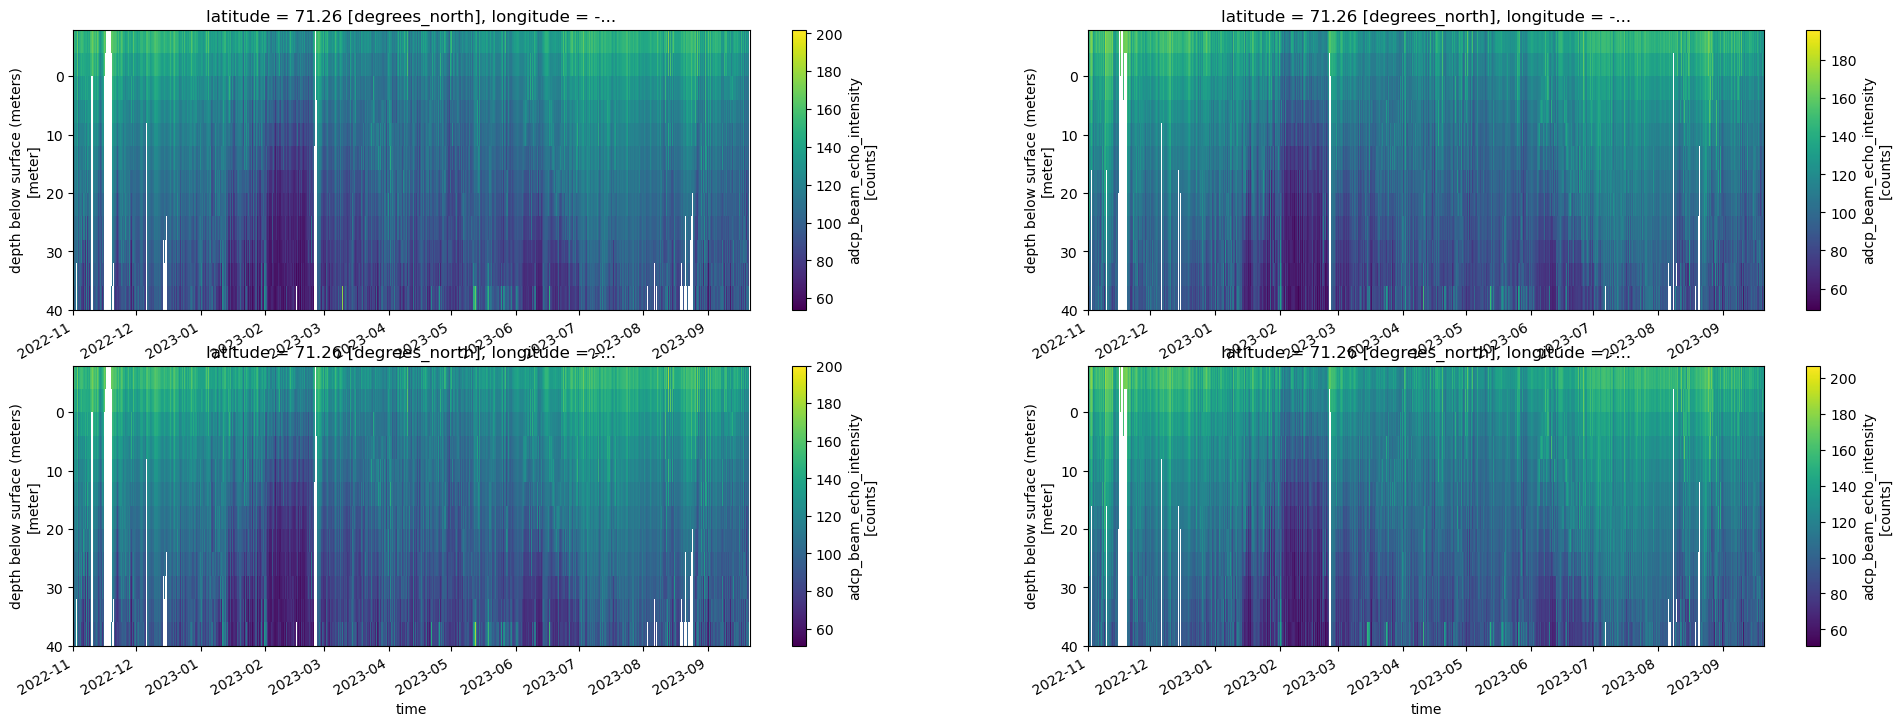

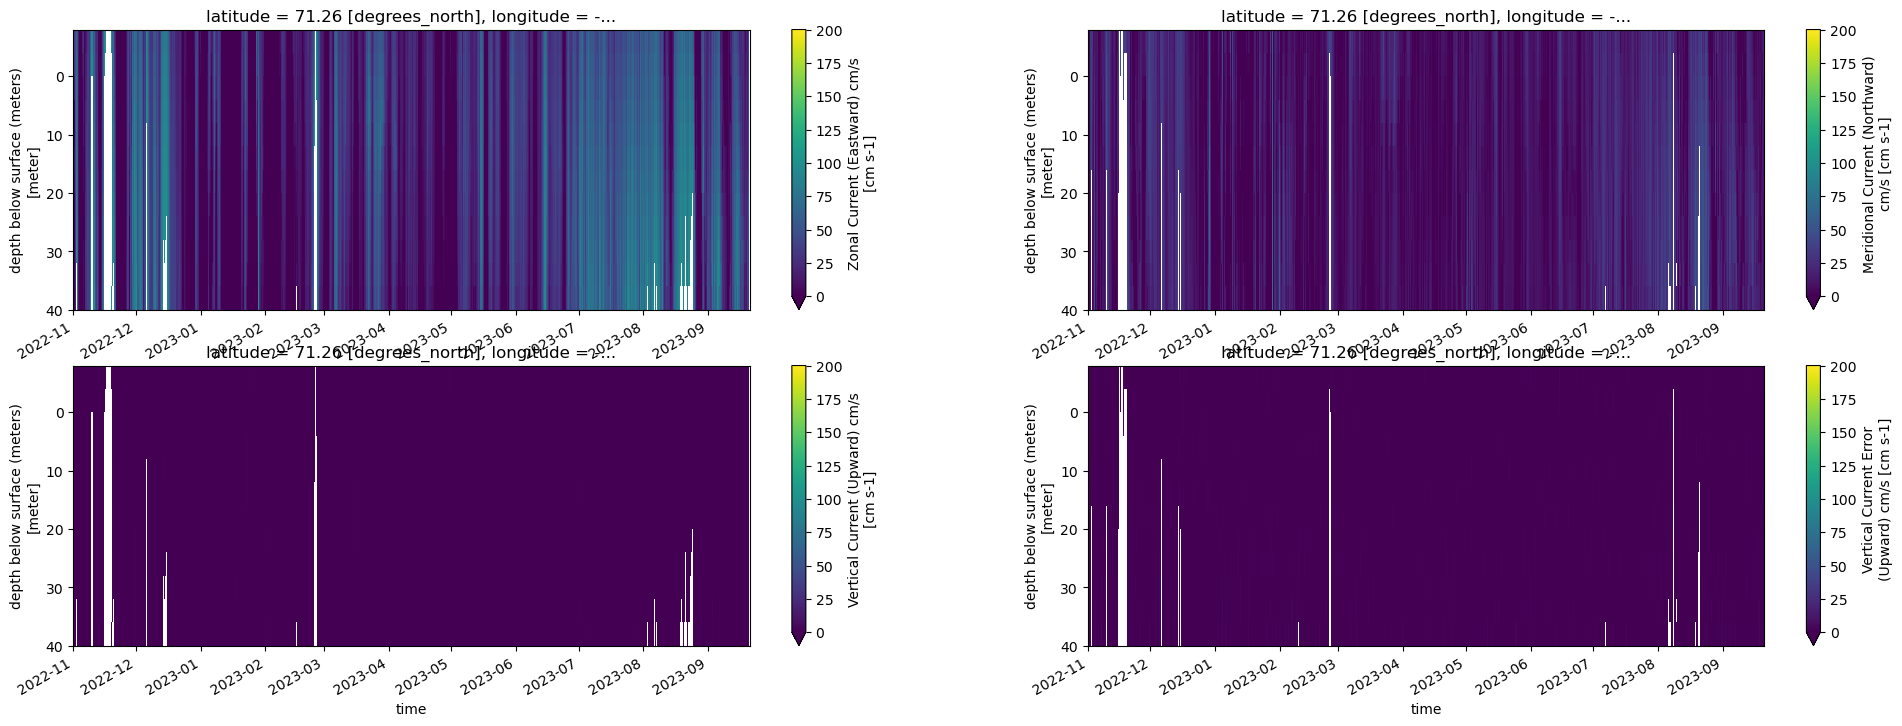

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >100cm/s'    

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('22upp3a_0068m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('22upp3a_0068m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

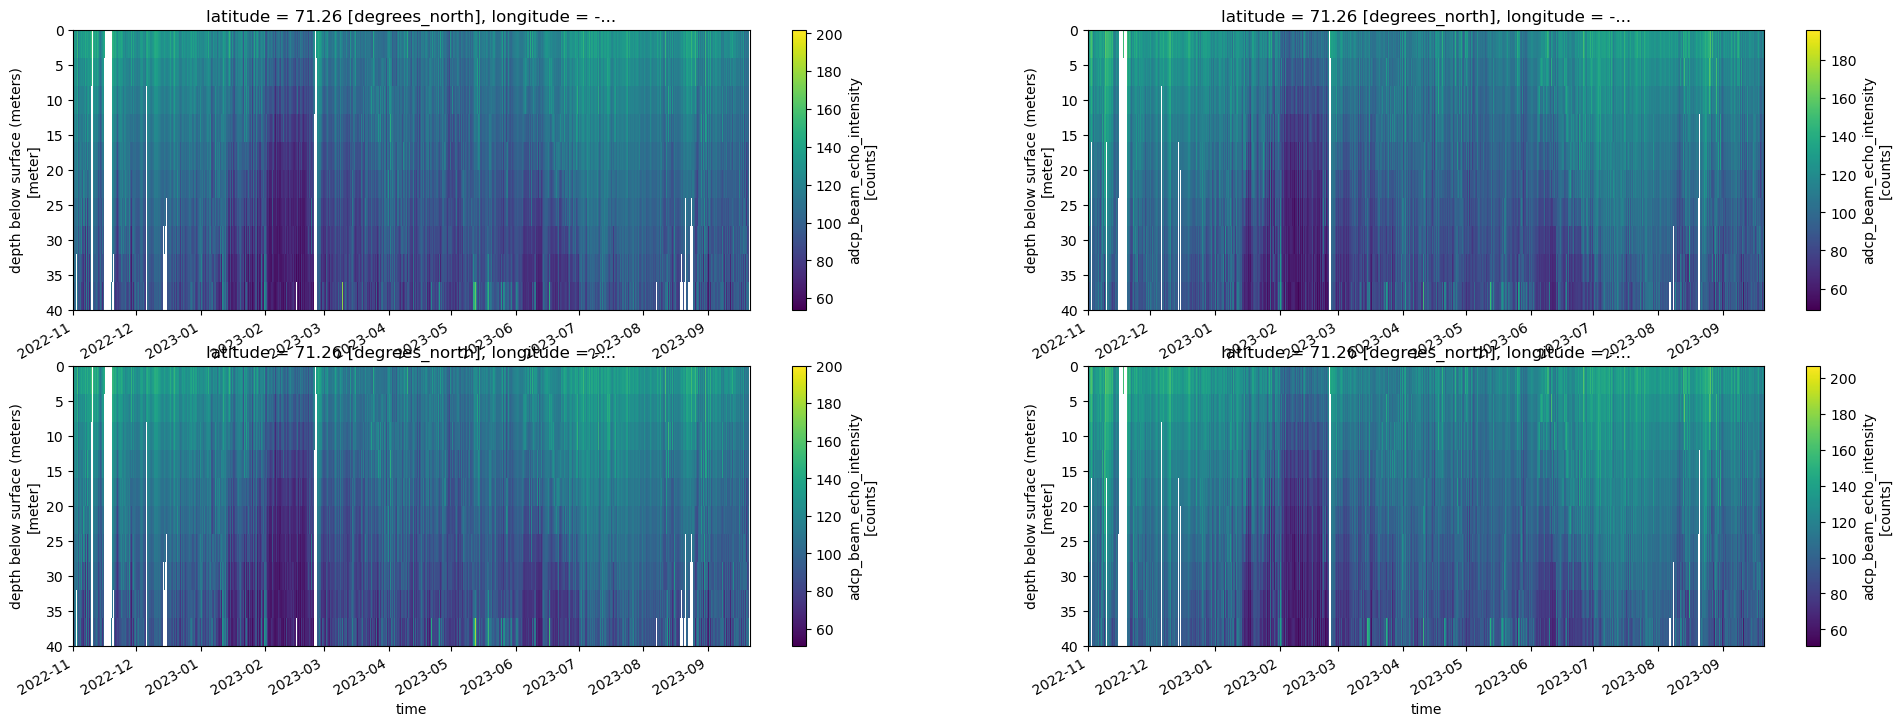

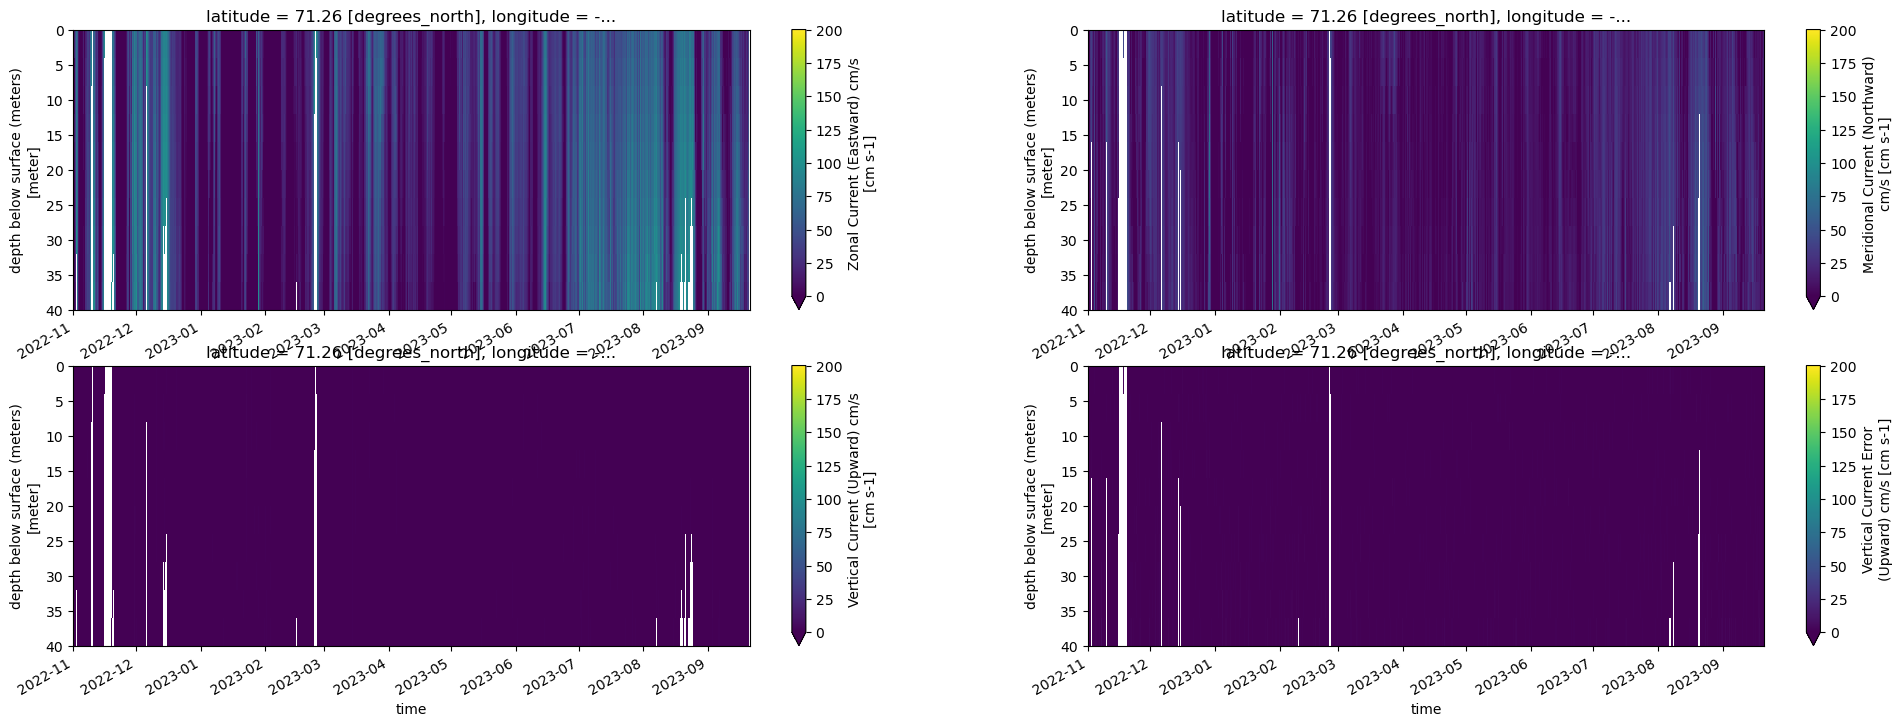

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [14]:
ixdf.to_netcdf('22ckp5a_0044m.filtered.nc')